In [2]:
import pandas

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from ipywidgets import interactive, fixed
import seaborn as sns
import math

In [4]:
df = pandas.read_csv('adult.data',header = None, index_col = False)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status',\
    'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',\
    'native-country','50K']

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50K               0
dtype: int64

# Missing Data
For the missing data in height and weight columns I elected to insert the average weight from our data set

In [9]:
df.replace({np.nan:None}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50K             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [12]:
df.skew()

C:\Users\kar\AppData\Local\Temp\ipykernel_2932\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

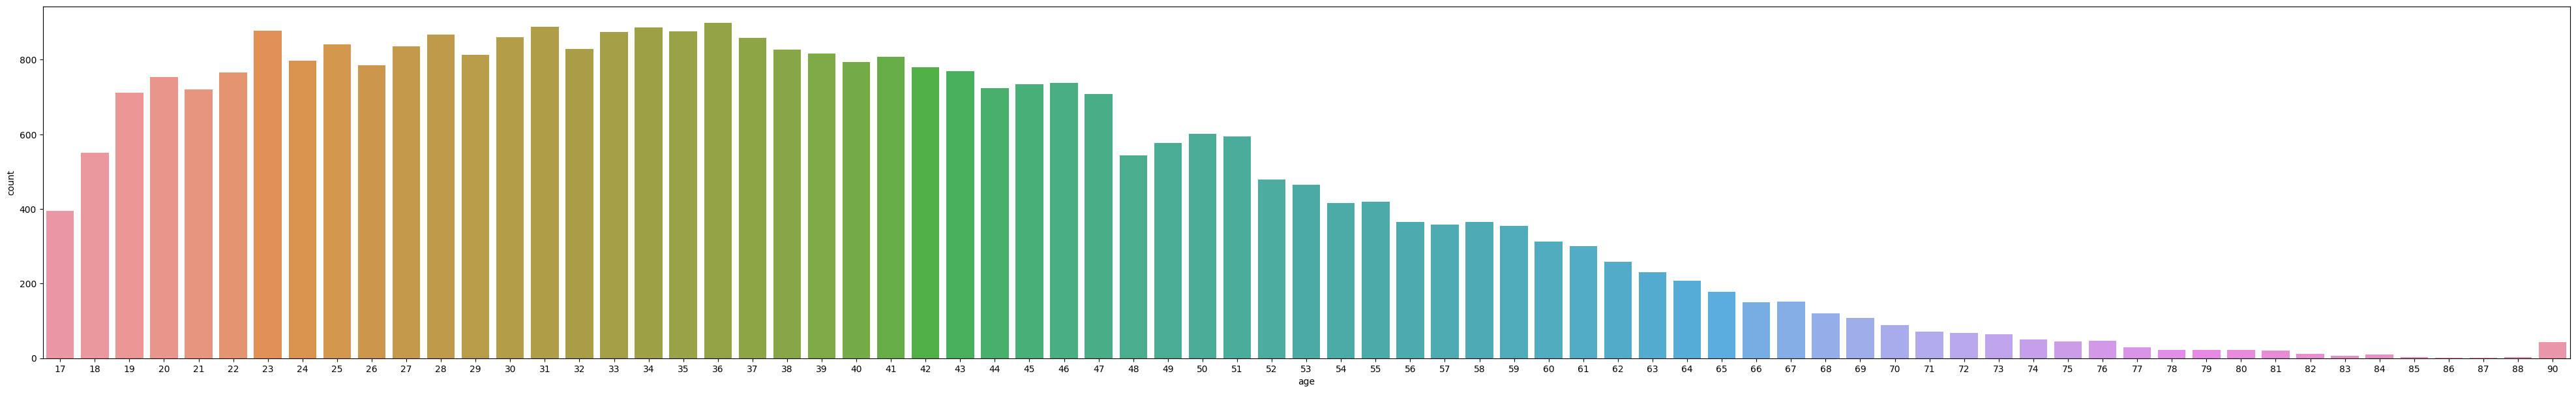

In [13]:
plt.figure(figsize=(50,7))
plt.xlabel('Age')
plt.ylabel('Count')
sns.countplot(x='age', data = df)
plt.show()

In [14]:
def ageTransform(age,age1,age2):
    if age <= age1:
        return 'young'
    elif age <= age2:
        return 'middle'
    else:
        return 'old'

In [15]:
ages = df['age']
ages = ages.sort_values(ignore_index = True)
age1 = ages[ages.size//3] # use the np percentile (ages,33)
age2 = ages[ages.size*2//3] # use the np percentile (ages, 66)
df['age'] = df.apply(lambda row: ageTransform(row['age'],age1,age2),axis=1)


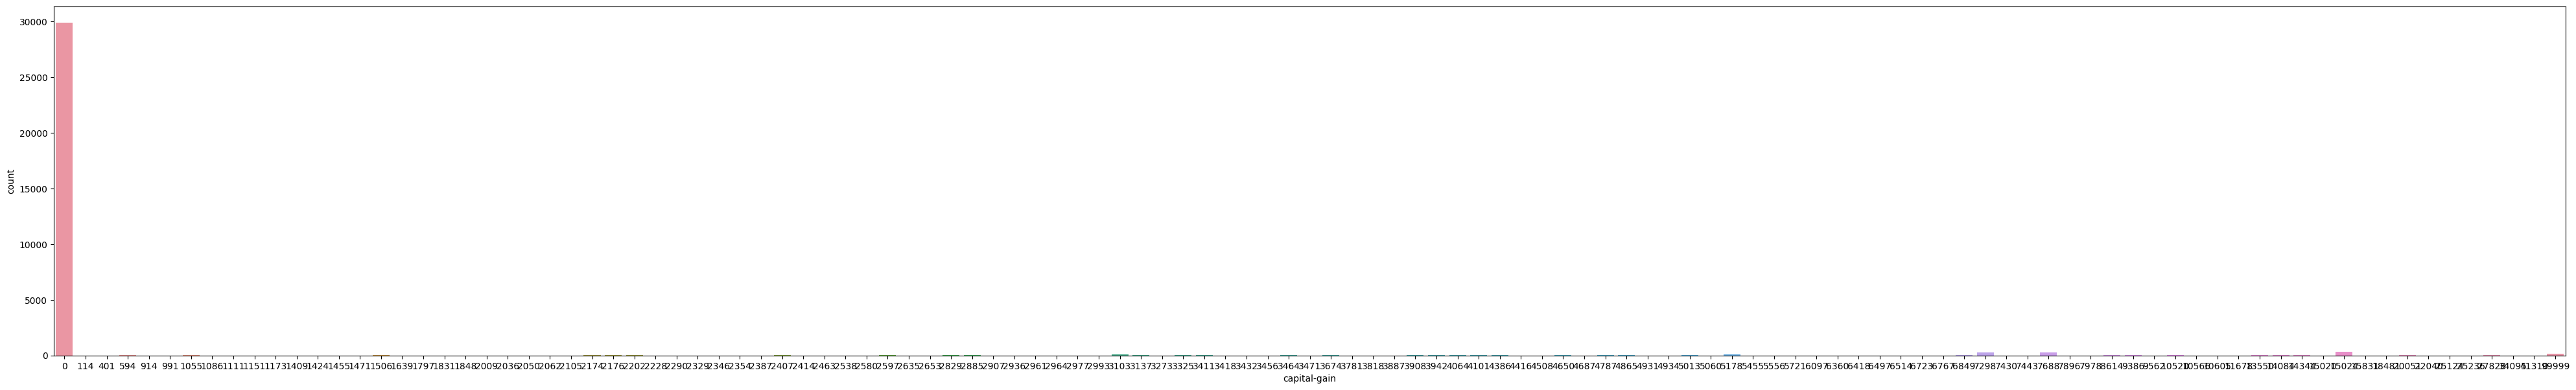

In [16]:
plt.figure(figsize=(50,7))
plt.xlabel('capital-gain')
plt.ylabel('Count')
sns.countplot(x='capital-gain', data = df)
plt.show()

In [17]:
def medianTransform(value,median):
    if value <= median:
        return 'low'
    else:
        return 'high'

In [18]:
mean = df['capital-gain'].mean()
print(mean)

1077.6488437087312


In [19]:
median = df['capital-gain'].median()
print(median)

0.0


In [20]:
df['capital-gain'] = df.apply(lambda row: medianTransform(row['capital-gain'],median),axis = 1)

In [21]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,high,0,40,United-States,<=50K
1,old,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,0,13,United-States,<=50K
2,middle,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,0,40,United-States,<=50K
3,old,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,0,40,United-States,<=50K
4,young,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,low,0,38,United-States,<=50K
32557,middle,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,0,40,United-States,>50K
32558,old,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,low,0,40,United-States,<=50K
32559,young,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,low,0,20,United-States,<=50K


# I dropped this collumn because we couldn't get a detailed explanation from the census bureau as to what the value represents

In [22]:
df.drop('fnlwgt', axis = 1, inplace = True)

In [23]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,high,0,40,United-States,<=50K
1,old,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,0,13,United-States,<=50K
2,middle,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,0,40,United-States,<=50K
3,old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,0,40,United-States,<=50K
4,young,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,low,0,38,United-States,<=50K
32557,middle,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,0,40,United-States,>50K
32558,old,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,low,0,40,United-States,<=50K
32559,young,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,low,0,20,United-States,<=50K


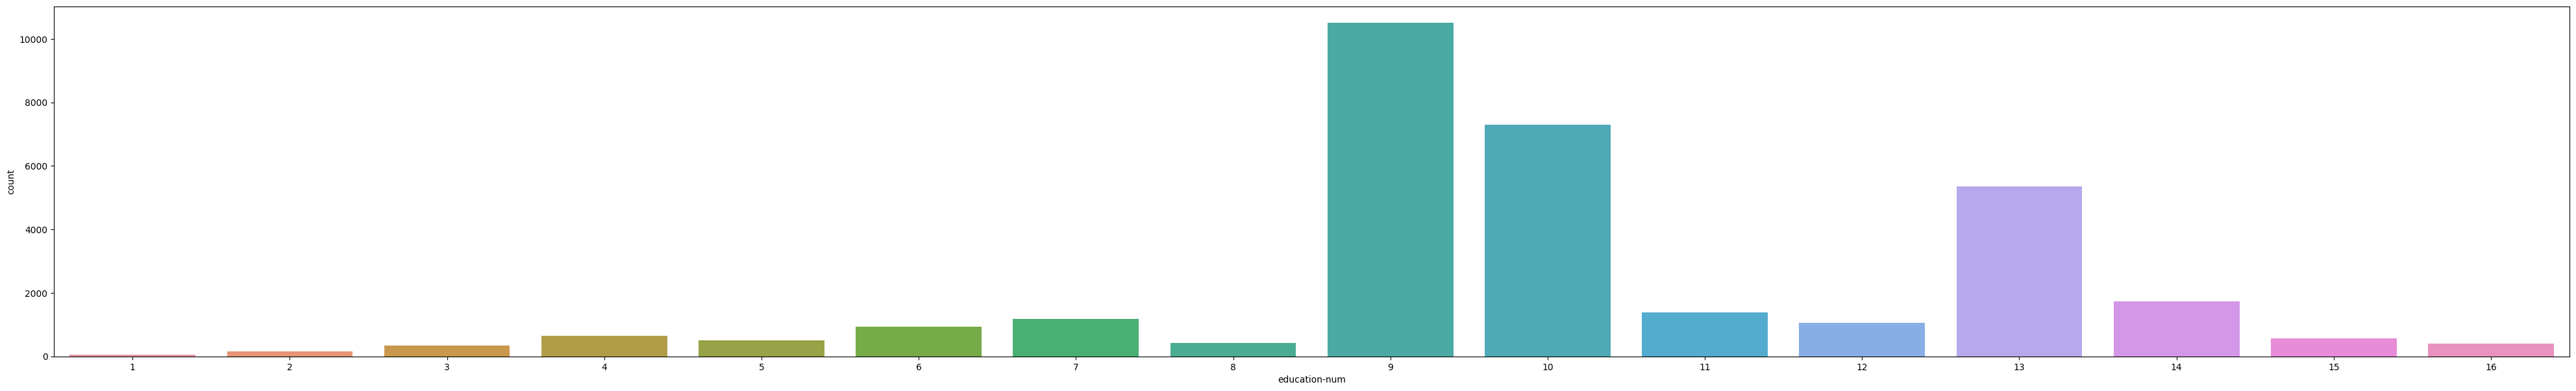

In [24]:
plt.figure(figsize=(50,7))
plt.xlabel('education')
plt.ylabel('Count')
sns.countplot(x='education-num', data = df)
plt.show()

In [25]:
median = df['education-num'].median()
print(median)

10.0


In [26]:
df['education-num'] = df.apply(lambda row: medianTransform(row['education-num'],median),axis = 1)

In [27]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,Bachelors,low,Never-married,Adm-clerical,Not-in-family,White,Male,high,0,40,United-States,<=50K
1,old,Self-emp-not-inc,Bachelors,low,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,0,13,United-States,<=50K
2,middle,Private,HS-grad,low,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,0,40,United-States,<=50K
3,old,Private,11th,low,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,0,40,United-States,<=50K
4,young,Private,Bachelors,low,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,Assoc-acdm,low,Married-civ-spouse,Tech-support,Wife,White,Female,low,0,38,United-States,<=50K
32557,middle,Private,HS-grad,low,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,0,40,United-States,>50K
32558,old,Private,HS-grad,low,Widowed,Adm-clerical,Unmarried,White,Female,low,0,40,United-States,<=50K
32559,young,Private,HS-grad,low,Never-married,Adm-clerical,Own-child,White,Male,low,0,20,United-States,<=50K


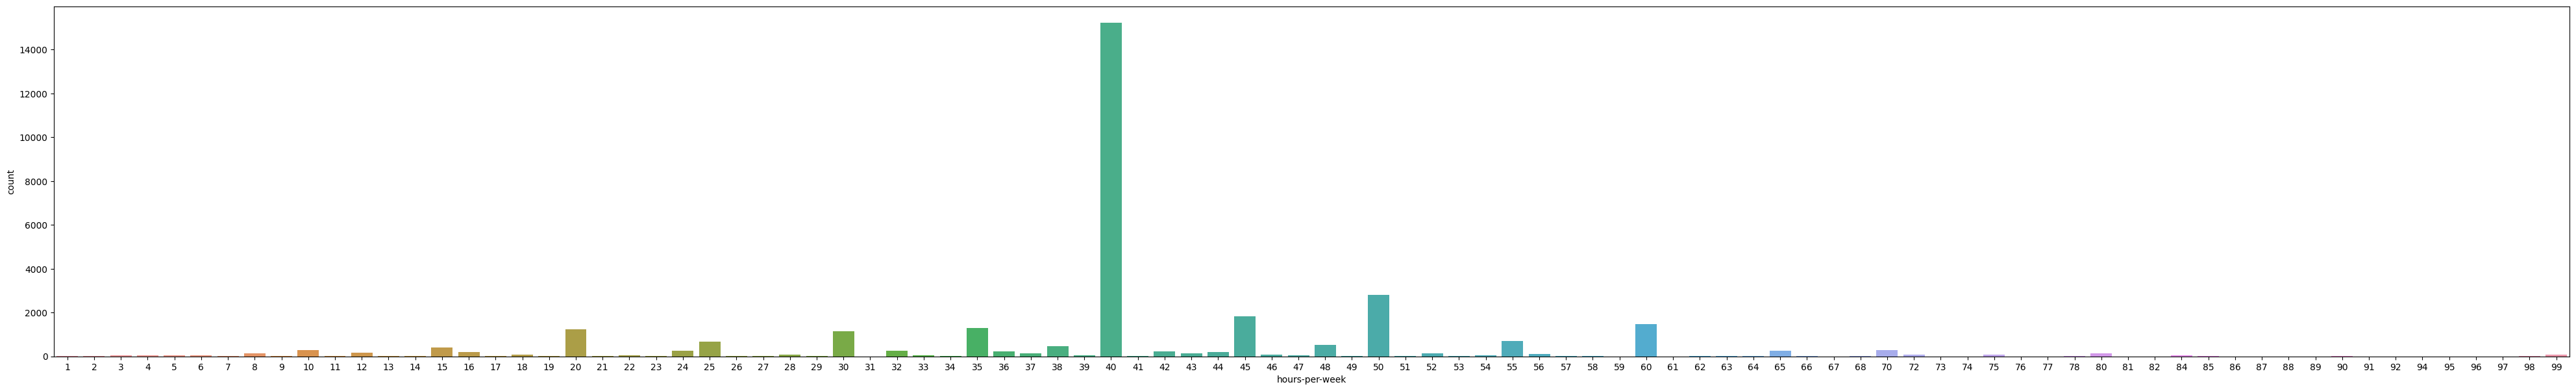

In [28]:
plt.figure(figsize=(50,7))
plt.xlabel('hours')
plt.ylabel('Count')
sns.countplot(x='hours-per-week', data = df)
plt.show()

In [29]:
def workTransform(hours,hours1,hours2):
    if hours <= hours1:
        return 'low'
    elif hours <= hours2:
        return 'middle'
    else:
        return 'high'

In [32]:
hours = df['hours-per-week']
hours = hours.sort_values(ignore_index = True)
hours1 = hours[hours.size//3]
hours2 = hours[hours.size*2//3]
df['hours-per-week'] = df.apply(lambda row: workTransform(row['hours-per-week'],hours1,hours2),axis=1)

In [33]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,Bachelors,low,Never-married,Adm-clerical,Not-in-family,White,Male,high,0,low,United-States,<=50K
1,old,Self-emp-not-inc,Bachelors,low,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,0,low,United-States,<=50K
2,middle,Private,HS-grad,low,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,0,low,United-States,<=50K
3,old,Private,11th,low,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,0,low,United-States,<=50K
4,young,Private,Bachelors,low,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,0,low,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,Assoc-acdm,low,Married-civ-spouse,Tech-support,Wife,White,Female,low,0,low,United-States,<=50K
32557,middle,Private,HS-grad,low,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,0,low,United-States,>50K
32558,old,Private,HS-grad,low,Widowed,Adm-clerical,Unmarried,White,Female,low,0,low,United-States,<=50K
32559,young,Private,HS-grad,low,Never-married,Adm-clerical,Own-child,White,Male,low,0,low,United-States,<=50K


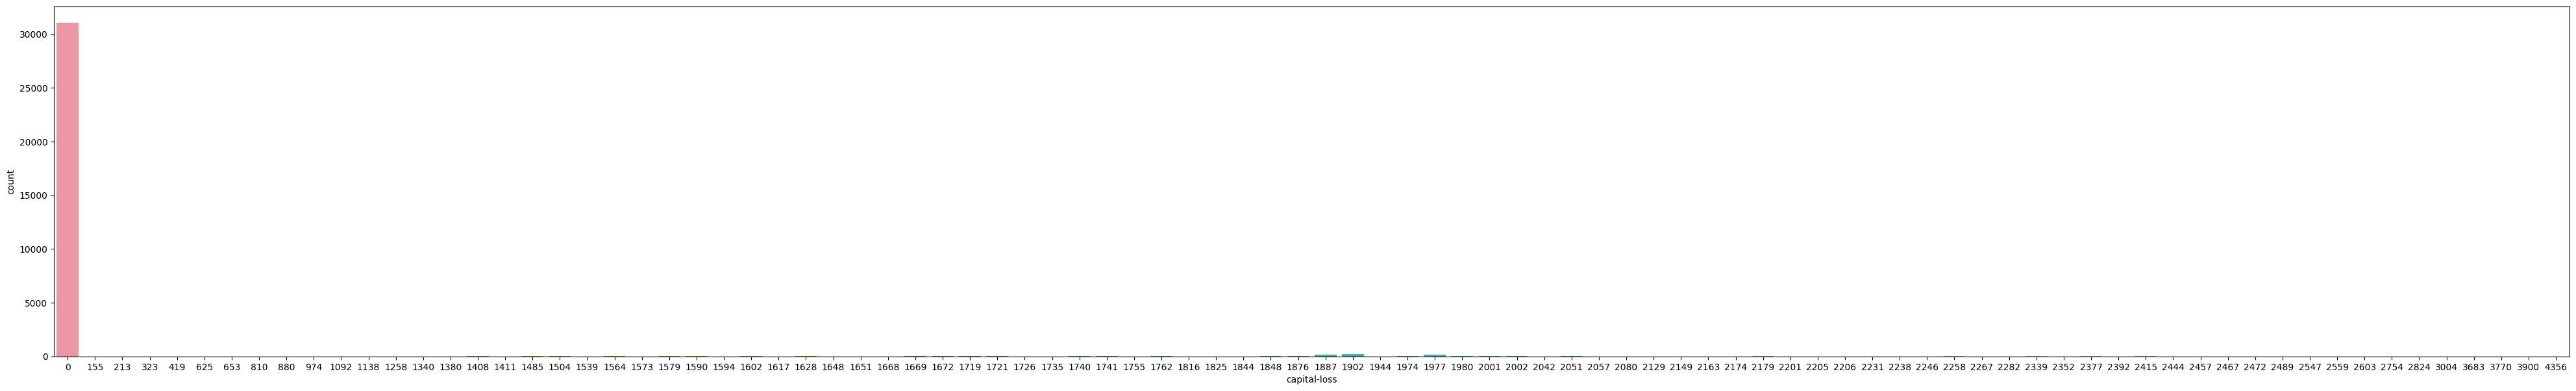

In [34]:
plt.figure(figsize=(50,7))
plt.xlabel('loss')
plt.ylabel('Count')
sns.countplot(x='capital-loss', data = df)
plt.show()

In [35]:
median = df['capital-loss'].median()
print(median)

0.0


In [36]:
df['capital-loss'] = df.apply(lambda row: medianTransform(row['capital-loss'],median),axis = 1)

In [37]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,Bachelors,low,Never-married,Adm-clerical,Not-in-family,White,Male,high,low,low,United-States,<=50K
1,old,Self-emp-not-inc,Bachelors,low,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,low,low,United-States,<=50K
2,middle,Private,HS-grad,low,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,low,low,United-States,<=50K
3,old,Private,11th,low,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,low,low,United-States,<=50K
4,young,Private,Bachelors,low,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,low,low,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,Assoc-acdm,low,Married-civ-spouse,Tech-support,Wife,White,Female,low,low,low,United-States,<=50K
32557,middle,Private,HS-grad,low,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,low,low,United-States,>50K
32558,old,Private,HS-grad,low,Widowed,Adm-clerical,Unmarried,White,Female,low,low,low,United-States,<=50K
32559,young,Private,HS-grad,low,Never-married,Adm-clerical,Own-child,White,Male,low,low,low,United-States,<=50K


In [38]:
def payTransform(pay):
    if pay == '<=50K':
        return 'n'
    else:
        return 'y'

In [39]:
df['50K'] = df.apply(lambda row: payTransform(row['50K']),axis = 1)

In [40]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,middle,State-gov,Bachelors,low,Never-married,Adm-clerical,Not-in-family,White,Male,high,low,low,United-States,y
1,old,Self-emp-not-inc,Bachelors,low,Married-civ-spouse,Exec-managerial,Husband,White,Male,low,low,low,United-States,y
2,middle,Private,HS-grad,low,Divorced,Handlers-cleaners,Not-in-family,White,Male,low,low,low,United-States,y
3,old,Private,11th,low,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,low,low,low,United-States,y
4,young,Private,Bachelors,low,Married-civ-spouse,Prof-specialty,Wife,Black,Female,low,low,low,Cuba,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,young,Private,Assoc-acdm,low,Married-civ-spouse,Tech-support,Wife,White,Female,low,low,low,United-States,y
32557,middle,Private,HS-grad,low,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,low,low,low,United-States,y
32558,old,Private,HS-grad,low,Widowed,Adm-clerical,Unmarried,White,Female,low,low,low,United-States,y
32559,young,Private,HS-grad,low,Never-married,Adm-clerical,Own-child,White,Male,low,low,low,United-States,y


In [41]:
df.to_csv('adults-corrected.csv',index = False)

# Next step is to use kfold to divide the data into test/training
Then we can provide the training data to our algorithm

# set up your kfold (number of data sets, randomize the order, etc.)



In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1) #random_state key to reproducing your data set

In [ ]:
setNum = 1
for train, test in kfold.split(df):
    # 'train' and 'test' are the row indices used for the training and test sets.
    # from those lists we can create the dataframes for training and testing

    print("Set %s\n  Train Rows:\n   %s\n  Test Rows:\n   %s\n\n"%(setNum,train,test))
    
    df.iloc[train].to_csv('training'+str(setNum)+'.csv',index = True)
    df.iloc[test].to_csv('test'+str(setNum)+'.csv',index = True)

    setNum += 1